In [121]:
#Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import squarify
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
import numpy as np
import seaborn as sns

sns.set_style("white")

from pprint import pprint
from config import api_key


In [122]:
#Convert Gold Tier 1 URL to DF
gold_url = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/I?page=1&api_key=" + api_key
gold_data = requests.get(gold_url).json()
gold_data_df = pd.DataFrame(gold_data)

In [21]:
#Convert Gold Tier 2 URL to DF
gold_url2 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/II?page=1&api_key=" + api_key
gold_data2 = requests.get(gold_url2).json()
gold_data_df2 = pd.DataFrame(gold_data2)


In [22]:
#Convert Gold Tier 3 URL to DF
gold_url3 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/III?page=1&api_key=" + api_key
gold_data3 = requests.get(gold_url3).json()
gold_data_df3 = pd.DataFrame(gold_data3)


In [23]:
#Convert Gold Tier 4 URL to DF
gold_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/IV?page=1&api_key=" + api_key
gold_data4 = requests.get(gold_url4).json()
gold_data_df4 = pd.DataFrame(gold_data4)

In [81]:
#Convert Gold Tier 4 URL to DF
gold_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/IV?page=1&api_key=" + api_key
gold_data4 = requests.get(gold_url4).json()
gold_data_df4 = pd.DataFrame(gold_data4)

,leagueId,queueType,tier,rank,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak,miniSeries
0,d1e891c8-78d6-4666-b079-16708ef8aad3,RANKED_SOLO_5x5,GOLD,I,kL8pVCm74gk3Tm1cRPOFMztqrOdkwqbTTpunQjRAN16K2rwW,TREEIRL420,44,97,81,False,False,False,False,NaN
1,8ac5369d-48bf-4424-b3aa-5e1c41754cdf,RANKED_SOLO_5x5,GOLD,I,7E1B5_95CH00tnlSx1DPV9ACNyEc0lp-ktfN652M5nrGwXDf,Strategyst0,29,412,411,False,False,False,False,NaN
2,e37291e2-07bd-4580-84db-4a1f60a48722,RANKED_SOLO_5x5,GOLD,I,JrPPcFTJRcc2y2td98f4tnjDW0bD0QDCtgCp2IwkVc0QdvR5,Argus Hunter,0,313,286,False,False,False,False,NaN
3,1143a0a6-4fac-467b-9c9b-9311403d1539,RANKED_SOLO_5x5,GOLD,I,la3_GRsc9J9gN-WCJSFhKAlCXfaZrsV5P0AYWSZCjDAX-is2,seekysolace,18,69,76,False,False,False,False,NaN
4,e5ffd738-cb01-448e-a5ee-80e03ae50824,RANKED_SOLO_5x5,GOLD,I,v1au8CnEEwKnR3O9vAy87BLyUkLbh21PBvvfuM0UmgrdVw89,Hi Im ThePamP,57,87,75,False,False,False,False,NaN


In [25]:
#Export FULL gold data frame to excel file
gold_df.to_excel(r'/Users/jw/Desktop/Group-3-Project\Gold_DF.xlsx', index = False)

In [26]:
#Drop unneeded columns - Clean DF
clean_gold_df = gold_df.drop(columns=['queueType', 'summonerName', 'inactive', 'freshBlood', 'hotStreak', 'miniSeries'])

In [27]:
#add all gold summoner ids to a list
gold_summonerId = list(gold_data_df['summonerId'])

gold_summonerId

['kL8pVCm74gk3Tm1cRPOFMztqrOdkwqbTTpunQjRAN16K2rwW',
 '7E1B5_95CH00tnlSx1DPV9ACNyEc0lp-ktfN652M5nrGwXDf',
 'JrPPcFTJRcc2y2td98f4tnjDW0bD0QDCtgCp2IwkVc0QdvR5',
 'la3_GRsc9J9gN-WCJSFhKAlCXfaZrsV5P0AYWSZCjDAX-is2',
 'v1au8CnEEwKnR3O9vAy87BLyUkLbh21PBvvfuM0UmgrdVw89',
 '0JSqeGAD0ZPfBOdPtd7uRQlsQ7qkX3-9pjQD9DHJbu3YdNTQ',
 'DuXczduq5p-0aIICiSFiFl4drGbYUnonBCagoNrS4OkWo0j9',
 'OydjuxU3SXpeBJXaqjY9APy6Ev9ufnqne4Yu4pVSPlvc57_G',
 'b9GaR5-trXKd4WXqYs2zxchuUu_YTfL1WzcfxbpS0ReQAzM-',
 'N79ZoQ_X3lGM4MedSjlMzdZzl3RQ1EdOcHKNu4-jjSbIF6sZ',
 '2dxMEjZ3zmrzadfYy9dG-KQoE-mqKDL6yASmvQ5ebgW4xJnf',
 'wWXBfUakxrYRtrerYvV4XJA_YQPPedohEf3704SeeA7vJESf',
 '7TQGgSoyfjQSF3riByOklaRwJ2RbdD2PK57aSo-6R6gPwcbD',
 'beoaWk774XYE8WenbHWIrMKnkRl0-H3lrtTc25UEXWg104hO',
 'vC7sDFRqOGkfPJS4PYyEktZMf-0JiUqnZKoCFmXB6_iZkJJH',
 'Yuh6RRzR4jwvSp-MRtgxvPTzv1819yuDklcfxHdhJHLGu9-E',
 'KIyucyjudByA3ZTw_hGGnFvavBGHpiqU6GTdgmb_3u2NJvf_',
 'zDZUCBQDelYcuFVD3TOa-6i0cqohXXVXAwlsNWlOAJ39hA8c',
 'K22ZjOE4fuixF2q2Rvv0Rc9JI5I4K466Agzp_84YFvjp

In [28]:
#Export cleaned gold data frame to excel file
clean_gold_df.to_excel(r'/Users/jw/Desktop/Group-3-Project\Clean_Gold_DF.xlsx', index = False)

In [29]:
#Convert Platinum Tier 1 URL to DF
platinum_url = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/I?page=1&api_key=" + api_key
platinum_data = requests.get(platinum_url).json()
platinum_data_df = pd.DataFrame(platinum_data)


In [30]:
#Convert Platinum Tier 2 URL to DF
platinum_url2 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/II?page=1&api_key=" + api_key
platinum_data2 = requests.get(platinum_url2).json()
platinum_data_df2 = pd.DataFrame(platinum_data2)

In [31]:
#Convert Platinum Tier 3 URL to DF
platinum_url3 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/III?page=1&api_key=" + api_key
platinum_data3 = requests.get(platinum_url3).json()
platinum_data_df3 = pd.DataFrame(platinum_data3)

In [32]:
#Convert Platinum Tier 4 URL to DF
platinum_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/IV?page=1&api_key=" + api_key
platinum_data4 = requests.get(platinum_url4).json()
platinum_data_df4 = pd.DataFrame(platinum_data4)


In [33]:
#Merge all DF into one using Concat
PDF = [platinum_data_df, platinum_data_df2, platinum_data_df3, platinum_data_df4]
platinum_df = pd.concat(PDF)

In [34]:
#Drop unneeded columns
clean_platinum_df = platinum_df.drop(columns=['queueType', 'summonerName', 'inactive', 'freshBlood', 'hotStreak', 'miniSeries'])

In [35]:
#export full platinum DF to excel file
platinum_df.to_excel(r'/Users/jw/Desktop/Group-3-Project\Platinum_DF.xlsx', index = False)

In [36]:
#export cleaned platinum DF to excel file
clean_platinum_df.to_excel(r'/Users/jw/Desktop/Group-3-Project/Clean_Platinum_DF.xlsx', index = False)

In [113]:
clean_platinum_df.head()

,leagueId,tier,rank,summonerId,leaguePoints,wins,losses,veteran
0,e9535aff-8d6f-4d83-aa68-be700453edf8,PLATINUM,I,b4h6IfSFfV1HGoqCTqKRoBuT6DLuRCFq6dLTGMhN0VF_4I8y,75,99,95,False
1,2a6ec9b0-cc92-48cc-baa8-c80994d14bba,PLATINUM,I,HkC5-BPZ_UK0-8WIt5o0V3EHSI0-DBZnWwKehVV6d_WG0uhQ,75,109,84,False
2,ced18464-d729-4402-8f39-7f7e43c53865,PLATINUM,I,u77KfuIbs3RNRfbOiLzmXpZ14y7FNE_48ftRI89bAqm2QVt-,75,148,112,False
3,5bc80f3d-d247-4beb-a9ca-27acb9847e1b,PLATINUM,I,45b8LY65Z7GRd7S3DqOFUuO_Nsiq5sRViWqP8Oqpz9ZAmBvW,0,12,10,False
4,5760a640-7af9-4935-bbb8-6f3ed3ecd6bf,PLATINUM,I,KEbyRB6ic7pQwFODe_gXZEbQDutrvp1WRLvIrAu661HEM0vE,36,7,10,False


In [97]:
champions_data = pd.read_json(r'file:///Users/jw/Downloads/dragontail-10.21.1/10.21.1/data/en_US/champion.json')

pd.DataFrame(champions_data)

#pprint(champions_data)
#http://ddragon.leagueoflegends.com/cdn/10.21.1/data/en_US/champion.json

,type,format,version,data
Aatrox,champion,standAloneComplex,10.21.1,"{'version': '10.21.1', 'id': 'Aatrox', 'key': ..."
Ahri,champion,standAloneComplex,10.21.1,"{'version': '10.21.1', 'id': 'Ahri', 'key': '1..."
Akali,champion,standAloneComplex,10.21.1,"{'version': '10.21.1', 'id': 'Akali', 'key': '..."
Alistar,champion,standAloneComplex,10.21.1,"{'version': '10.21.1', 'id': 'Alistar', 'key':..."
Amumu,champion,standAloneComplex,10.21.1,"{'version': '10.21.1', 'id': 'Amumu', 'key': '..."
...,...,...,...,...
Zed,champion,standAloneComplex,10.21.1,"{'version': '10.21.1', 'id': 'Zed', 'key': '23..."
Ziggs,champion,standAloneComplex,10.21.1,"{'version': '10.21.1', 'id': 'Ziggs', 'key': '..."
Zilean,champion,standAloneComplex,10.21.1,"{'version': '10.21.1', 'id': 'Zilean', 'key': ..."
Zoe,champion,standAloneComplex,10.21.1,"{'version': '10.21.1', 'id': 'Zoe', 'key': '14..."


In [109]:
champion_dict = champions_data['data']

keys = []
values = []
items = champion_dict.items()

for item in items:
    keys.append(item[0]), values.append(item[1])
    
print ("keys : ", str(keys)) 
print(str(values))


keys :  ['Aatrox', 'Ahri', 'Akali', 'Alistar', 'Amumu', 'Anivia', 'Annie', 'Aphelios', 'Ashe', 'AurelionSol', 'Azir', 'Bard', 'Blitzcrank', 'Brand', 'Braum', 'Caitlyn', 'Camille', 'Cassiopeia', 'Chogath', 'Corki', 'Darius', 'Diana', 'DrMundo', 'Draven', 'Ekko', 'Elise', 'Evelynn', 'Ezreal', 'Fiddlesticks', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Garen', 'Gnar', 'Gragas', 'Graves', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'Ivern', 'Janna', 'JarvanIV', 'Jax', 'Jayce', 'Jhin', 'Jinx', 'Kaisa', 'Kalista', 'Karma', 'Karthus', 'Kassadin', 'Katarina', 'Kayle', 'Kayn', 'Kennen', 'Khazix', 'Kindred', 'Kled', 'KogMaw', 'Leblanc', 'LeeSin', 'Leona', 'Lillia', 'Lissandra', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'Malzahar', 'Maokai', 'MasterYi', 'MissFortune', 'MonkeyKing', 'Mordekaiser', 'Morgana', 'Nami', 'Nasus', 'Nautilus', 'Neeko', 'Nidalee', 'Nocturne', 'Nunu', 'Olaf', 'Orianna', 'Ornn', 'Pantheon', 'Poppy', 'Pyke', 'Qiyana', 'Quinn', 'Rakan', 'Rammus', 'RekSai', 'Renekton', 'Rengar', 'Ri

In [104]:
print(values['key'])

TypeError: list indices must be integers or slices, not str

In [96]:
pprint(champions_data)

             type             format  version  \
Aatrox   champion  standAloneComplex  10.21.1   
Ahri     champion  standAloneComplex  10.21.1   
Akali    champion  standAloneComplex  10.21.1   
Alistar  champion  standAloneComplex  10.21.1   
Amumu    champion  standAloneComplex  10.21.1   
...           ...                ...      ...   
Zed      champion  standAloneComplex  10.21.1   
Ziggs    champion  standAloneComplex  10.21.1   
Zilean   champion  standAloneComplex  10.21.1   
Zoe      champion  standAloneComplex  10.21.1   
Zyra     champion  standAloneComplex  10.21.1   

                                                      data  
Aatrox   {'version': '10.21.1', 'id': 'Aatrox', 'key': ...  
Ahri     {'version': '10.21.1', 'id': 'Ahri', 'key': '1...  
Akali    {'version': '10.21.1', 'id': 'Akali', 'key': '...  
Alistar  {'version': '10.21.1', 'id': 'Alistar', 'key':...  
Amumu    {'version': '10.21.1', 'id': 'Amumu', 'key': '...  
...                                          

In [38]:
#add all platinum summoner ids to a list
platinum_summonerId = list(platinum_data_df['summonerId'])

platinum_summonerId

['b4h6IfSFfV1HGoqCTqKRoBuT6DLuRCFq6dLTGMhN0VF_4I8y',
 'HkC5-BPZ_UK0-8WIt5o0V3EHSI0-DBZnWwKehVV6d_WG0uhQ',
 'u77KfuIbs3RNRfbOiLzmXpZ14y7FNE_48ftRI89bAqm2QVt-',
 '45b8LY65Z7GRd7S3DqOFUuO_Nsiq5sRViWqP8Oqpz9ZAmBvW',
 'KEbyRB6ic7pQwFODe_gXZEbQDutrvp1WRLvIrAu661HEM0vE',
 'ODV8HRD3A6e3yoTGLW5FEHSD6m5LehwBKXiVdllqTGuVbTLt',
 'LC6QwpXOWn1nIEYNFp9ssSiy2PXBJ72PomLf7SjZbcwNb28F',
 'qucRi6-Z9xdC0Ix-lhkLm3O69uwF66vqXDPArr6Ih0RrAq6G',
 'fRY_fN9anaF66HjI4ROaprn7ScTsFUjZXqHw9KjriSJMrwW-',
 '4q-BbjXST7vtKsVup6QoL_0tprRmBQb4WNs7HcqwAQAap14k',
 'LQXyvr3n5b5jWZ6xlPKP1OQIS-Ft-8Xjwag1Z5Fh_V5PXeVc',
 'l6vj0ljrEC2J2rB_QWlpjAnW9gKFuXkEnnjICn2tl_qUh87N',
 'mqvmTJNM3zjHiV7wh3utKIHHa8imUpLXhPxt1f0WN-l2s57l',
 '5343LTgZhgIc24QPwIaUcUkfZF8kNhjcB4Zzaruw1Kd0W4tK',
 'evd7KHSXQ6W-an5dh814-Md5ZaW4SPH3BJsSWy8dvdls1cBH',
 'YfDc_FsQ5O0VHzhmdvNQh4IMDdeAshvn4g7KWfieC0-Z91we',
 'lTJpJGAk8nT4mQzlDv_MNSQpa-vyKzvQfVaw5ghehruWNjS2',
 '766pstJk392tJhssk6kC7Tm2lG3dhRm3f_CseP1DbVAmcN4A',
 'CyfrYH9ipKhOrApPKALUrld6a8Ad1_EbJZWmND2o0623

TypeError: 'method' object is not iterable

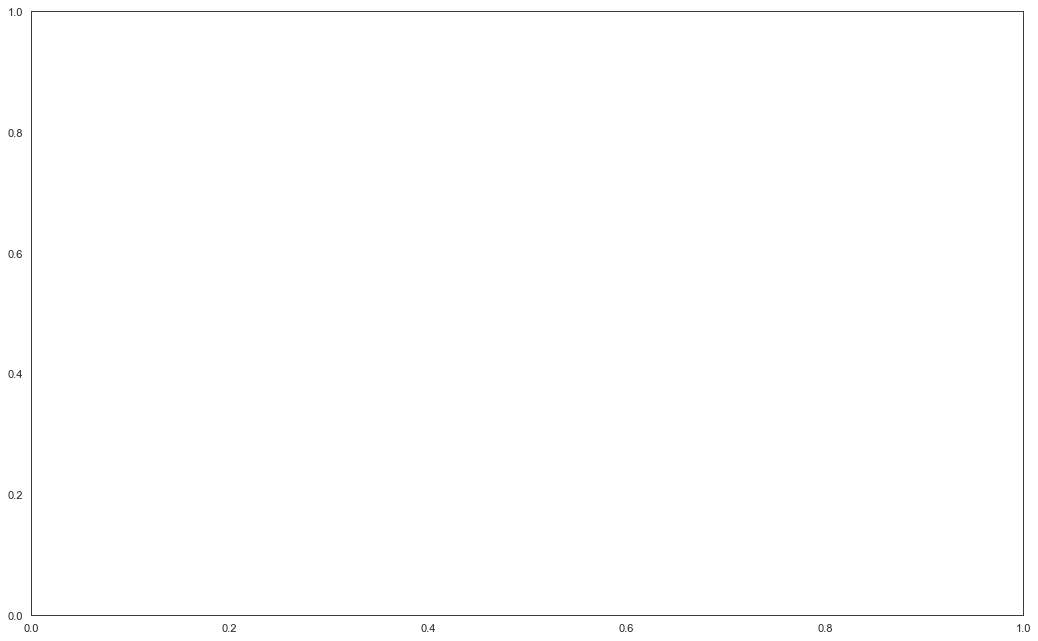

In [39]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(clean_platinum_df.rank, clean_platinum_df.veteran, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

In [123]:
#Looping through top 100 summoners in Gold Tier and outputting data for champion they last used.
summoner_id = gold_summonerId[:100]

first_championID_list = []
for i in summoner_id:
    url = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + i + "?api_key=" + api_key
    response = requests.get(url).json()
    first_championID = response[0]
    first_championID_list.append(first_championID)

In [115]:
gold_champion_df100 = pd.DataFrame(first_championID_list)
gold_champion_df100

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,summonerId
0,412,7,153480,1602440759000,131880,0,True,0,kL8pVCm74gk3Tm1cRPOFMztqrOdkwqbTTpunQjRAN16K2rwW
1,8,7,131130,1601102548000,109530,0,True,0,7E1B5_95CH00tnlSx1DPV9ACNyEc0lp-ktfN652M5nrGwXDf
2,40,7,318319,1603318289000,296719,0,True,0,JrPPcFTJRcc2y2td98f4tnjDW0bD0QDCtgCp2IwkVc0QdvR5
3,127,6,185458,1603427040000,163858,0,True,3,la3_GRsc9J9gN-WCJSFhKAlCXfaZrsV5P0AYWSZCjDAX-is2
4,64,6,117672,1597728713000,96072,0,True,2,v1au8CnEEwKnR3O9vAy87BLyUkLbh21PBvvfuM0UmgrdVw89
...,...,...,...,...,...,...,...,...,...
95,86,7,142175,1596409513000,120575,0,True,0,wrVltAGHHoGAfCK_UebANrjp_fhNNReRFaBfpXS9g2b9X3LC
96,145,7,107121,1603430708000,85521,0,True,0,gnNixogHY5kBFwnKnTHWiLMJ6bA_sANeZoFZz7fmHnyDvqa0
97,17,5,47110,1597116181000,25510,0,True,2,-ZI-Uc0tROMplkiZ1B8IEMKSq4eprGnWvZ1r8FwX-73YZmbH
98,35,5,37698,1578005073000,16098,0,False,2,S3-GPtNRDUCkW-Ecb9DFPYsFAPlUm5PY8k0PXGKhAwcgxqGQ


In [42]:
champion_df.count()

championId                      100
championLevel                   100
championPoints                  100
lastPlayTime                    100
championPointsSinceLastLevel    100
championPointsUntilNextLevel    100
chestGranted                    100
tokensEarned                    100
summonerId                      100
dtype: int64

In [43]:
champion_df['championLevel']

0     7
1     7
2     7
3     6
4     6
     ..
95    7
96    7
97    5
98    5
99    5
Name: championLevel, Length: 100, dtype: int64

Text(0.5, 0, 'Champion Points')

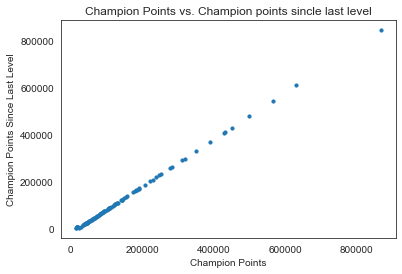

In [51]:
plt.scatter(champion_df['championPoints'], champion_df['championPointsSinceLastLevel'], marker = 'o', s=10)
plt.title("Champion Points vs. Champion points sincle last level")
plt.ylabel("Champion Points Since Last Level")
plt.xlabel("Champion Points")

In [85]:
response =  requests.get(f"http://ddragon.leagueoflegends.com/cdn/10.21.1/data/en_US/champion").json

champion_data_df = pd.DataFrame(response)

ValueError: DataFrame constructor not properly called!

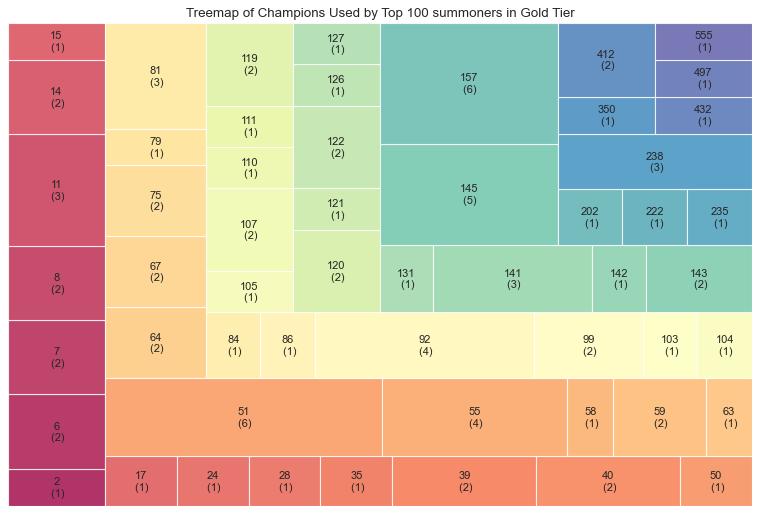

In [112]:
golgoldCham


In [114]:
champion_ID_DF

,championId,counts
0,2,1
1,6,2
2,7,2
3,8,2
4,11,3
5,14,2
6,15,1
7,17,1
8,24,1
9,28,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

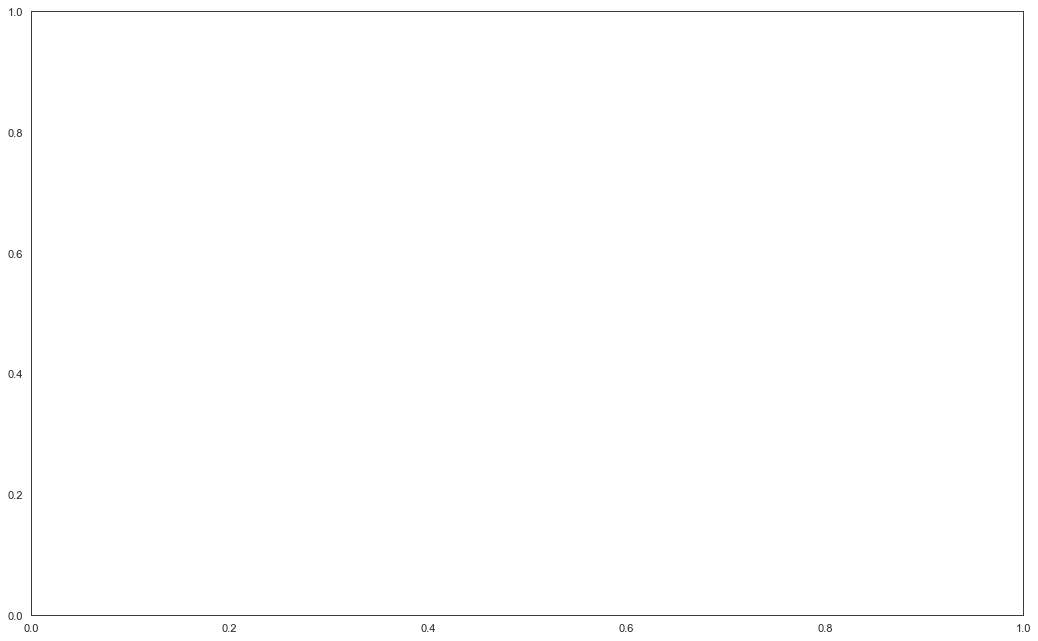

In [53]:
categories = np.unique(champion_df['championId'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

championId = champion_df['championId']
championLevel = champion_df['championLevel']
championPoints = champion_df['championPoints']

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, championId in enumerate(categories):
    plt.scatter('championLevel', 'championPoints', data=champion_df.loc[champion_df.championId==championId, :], s='dot_size', c=colors[i], label=str(championId), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
champion_encircle_data = champion_df.loc[champion_df.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(champion_encircle_data.championLevel, champion_encircle_data.championPoints, ec="k", fc="gold", alpha=0.1)
encircle(champion_encircle_data.championLevel, champion_encircle_data.championPoints, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Champion Level', ylabel='Champion Points')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


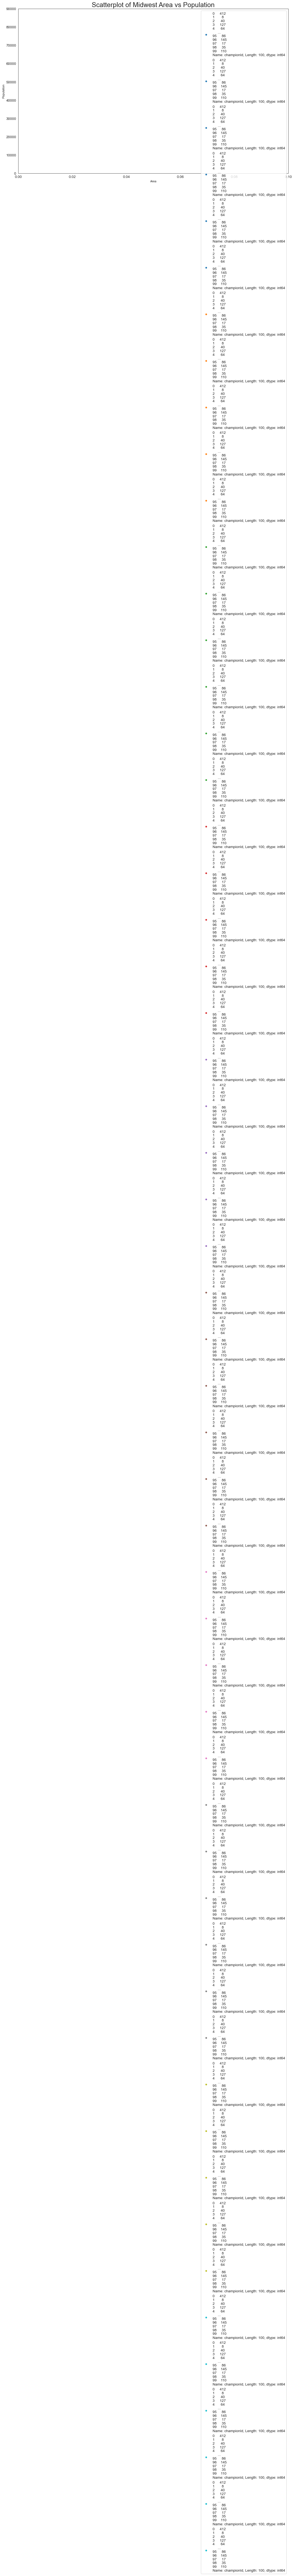

In [54]:
# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(champion_df['championId'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
championId = champion_df['championId']
# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('championLevel', 'championPoints', 
                data=champion_df.loc[champion_df.championId==championId, :], 
                s=20, c=colors[i], label=str(championId))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

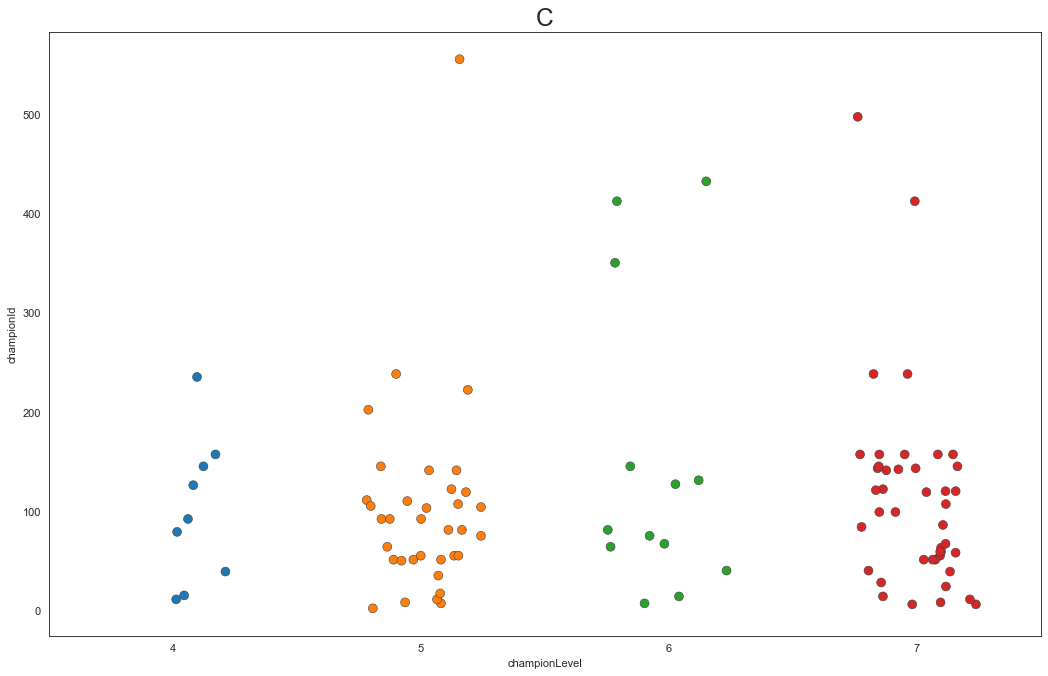

In [78]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(champion_df.championLevel, champion_df.championId, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title(('C'), fontsize=22)
plt.show()

In [56]:
#Function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
   
    x_values = clean_gold_df['wins']
    y_values = clean_gold_df['losses']
    
    plt.show

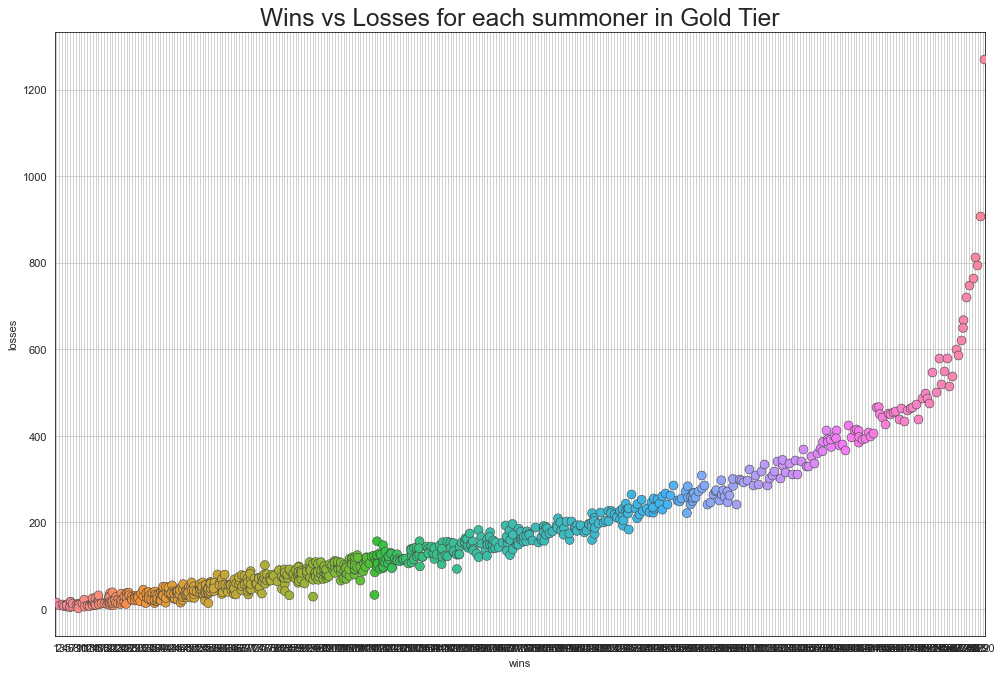

In [76]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(15,10), dpi= 80)    
sns.stripplot(clean_gold_df.wins, clean_gold_df.losses, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.grid(True)


#plt.xticks(np.arange(0, len(clean_gold_df.wins) + 1, 300))
frequency=100

# Decorations
plt.title('Wins vs Losses for each summoner in Gold Tier', fontsize=22)
plt.show()

In [75]:
len(clean_gold_df.wins)

820

In [120]:
plat_summoner_id = platinum_summonerId[:100]

first_championID_list_plat = []
for i in plat_summoner_id:
    url2 = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + i + "?api_key=" + api_key
    response_plat = requests.get(url2).json()
    first_championID_plat = response_plat[0]
    first_championID_list_plat.append(first_championID_plat)

In [119]:
plat_champion_ID100 = pd.DataFrame(first_championID_list_plat)
plat_champion_ID100

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,summonerId
0,110,5,57938,1601615614000,36338,0,True,2,adg7XH8G4-eG6Kt1hYcX7V4b9KPZu-VPjh6YuE7KqiQe7RVH
1,110,5,57938,1601615614000,36338,0,True,2,adg7XH8G4-eG6Kt1hYcX7V4b9KPZu-VPjh6YuE7KqiQe7RVH
2,110,5,57938,1601615614000,36338,0,True,2,adg7XH8G4-eG6Kt1hYcX7V4b9KPZu-VPjh6YuE7KqiQe7RVH
3,110,5,57938,1601615614000,36338,0,True,2,adg7XH8G4-eG6Kt1hYcX7V4b9KPZu-VPjh6YuE7KqiQe7RVH
4,110,5,57938,1601615614000,36338,0,True,2,adg7XH8G4-eG6Kt1hYcX7V4b9KPZu-VPjh6YuE7KqiQe7RVH
...,...,...,...,...,...,...,...,...,...
95,110,5,57938,1601615614000,36338,0,True,2,adg7XH8G4-eG6Kt1hYcX7V4b9KPZu-VPjh6YuE7KqiQe7RVH
96,110,5,57938,1601615614000,36338,0,True,2,adg7XH8G4-eG6Kt1hYcX7V4b9KPZu-VPjh6YuE7KqiQe7RVH
97,110,5,57938,1601615614000,36338,0,True,2,adg7XH8G4-eG6Kt1hYcX7V4b9KPZu-VPjh6YuE7KqiQe7RVH
98,110,5,57938,1601615614000,36338,0,True,2,adg7XH8G4-eG6Kt1hYcX7V4b9KPZu-VPjh6YuE7KqiQe7RVH


In [117]:
gold_champion_df100

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,summonerId
0,412,7,153480,1602440759000,131880,0,True,0,kL8pVCm74gk3Tm1cRPOFMztqrOdkwqbTTpunQjRAN16K2rwW
1,8,7,131130,1601102548000,109530,0,True,0,7E1B5_95CH00tnlSx1DPV9ACNyEc0lp-ktfN652M5nrGwXDf
2,40,7,318319,1603318289000,296719,0,True,0,JrPPcFTJRcc2y2td98f4tnjDW0bD0QDCtgCp2IwkVc0QdvR5
3,127,6,185458,1603427040000,163858,0,True,3,la3_GRsc9J9gN-WCJSFhKAlCXfaZrsV5P0AYWSZCjDAX-is2
4,64,6,117672,1597728713000,96072,0,True,2,v1au8CnEEwKnR3O9vAy87BLyUkLbh21PBvvfuM0UmgrdVw89
...,...,...,...,...,...,...,...,...,...
95,86,7,142175,1596409513000,120575,0,True,0,wrVltAGHHoGAfCK_UebANrjp_fhNNReRFaBfpXS9g2b9X3LC
96,145,7,107121,1603430708000,85521,0,True,0,gnNixogHY5kBFwnKnTHWiLMJ6bA_sANeZoFZz7fmHnyDvqa0
97,17,5,47110,1597116181000,25510,0,True,2,-ZI-Uc0tROMplkiZ1B8IEMKSq4eprGnWvZ1r8FwX-73YZmbH
98,35,5,37698,1578005073000,16098,0,False,2,S3-GPtNRDUCkW-Ecb9DFPYsFAPlUm5PY8k0PXGKhAwcgxqGQ


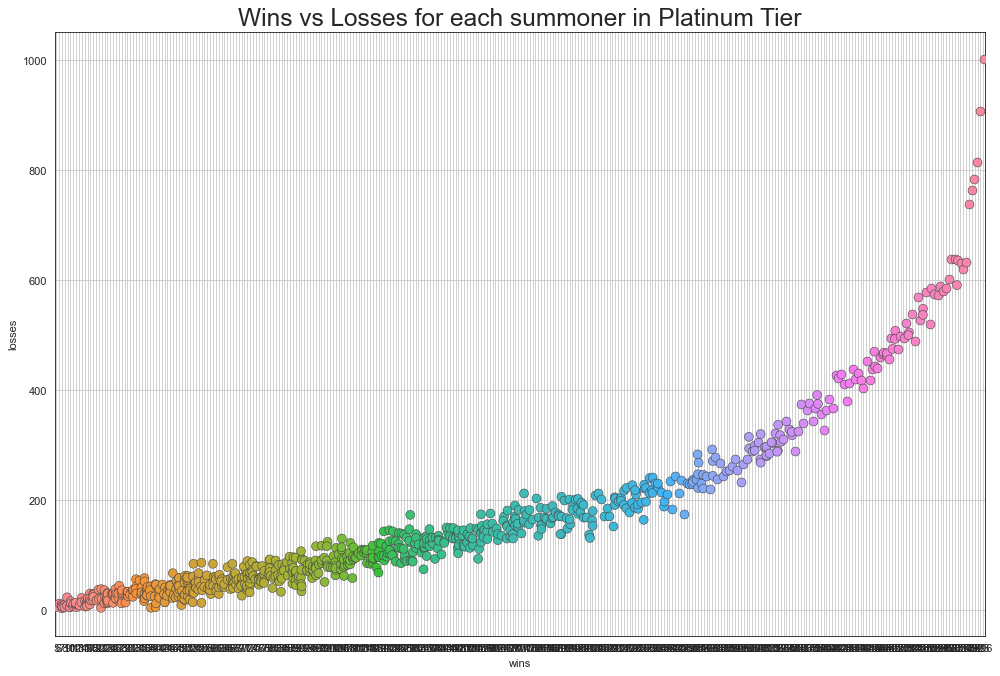

In [111]:
fig, ax = plt.subplots(figsize=(15,10), dpi= 80)    
sns.stripplot(clean_platinum_df.wins, clean_platinum_df.losses, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.grid(True)


#plt.xticks(np.arange(0, len(clean_gold_df.wins) + 1, 300))
frequency=100

# Decorations
plt.title('Wins vs Losses for each summoner in Platinum Tier', fontsize=22)
plt.show()

In [ ]:
champion_ID_DF = champion_df.groupby('championId').size().reset_index(name='counts')
labels = champion_ID_DF.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = champion_ID_DF['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Treemap of Champions Used by Top 100 summoners in Platinum Tier')
plt.axis('off')
plt.show()